In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### a)предметная область, источник данных, характер данных (реальные или имитационные)
### b)какие атрибуты представлены в датасете, их тип (числовой, строковый (категории)), что они обозначают
### c)есть ли описание задачи анализа, если есть - представить

#### Набор данных Uncleaned Laptop Price представляет собой набор списков продуктов для ноутбуков, взятых с веб-сайта электронной коммерции. Набор данных включает информацию о различных моделях ноутбуков, такую как их бренд, размер экрана, процессор, память, объем памяти, операционная система и цена. Однако набор данных не очищается, что означает, что он содержит пропущенные значения, несогласованное форматирование и другие ошибки, которые необходимо устранить, прежде чем данные можно будет использовать для анализа или моделирования.

#### Набор данных содержит как категориальные, так и числовые переменные, причем большинство переменных являются категориальными, включая марку, название модели, разрешение экрана, тип процессора и операционную систему. Некоторые числовые переменные включают размер экрана, память и объем памяти. Целевой переменной в наборе данных является цена, которая является непрерывной переменной.

#### Набор данных содержит более 1300 списков ноутбуков, что делает его набором данных разумного размера для анализа и моделирования. Набор данных может быть полезен для проектов машинного обучения, связанных с прогнозированием цены ноутбука на основе его характеристик. Однако перед использованием набора данных необходимо очистить и предварительно обработать данные, чтобы устранить несоответствия и отсутствующие значения.

In [15]:
df = pd.read_csv('laptopData.csv')

In [18]:
df = df[df['Weight'].str.contains('kg')==True]
df = df[df['Weight'].str.contains(r'\d')==True]
df = df[df['Inches'].str.contains(r'\d')==True]
df = df[df['Memory'].str.contains('\?')==False]
df['Weight']=df['Weight'].str.extract(r'([0-9]{1}[0-9]*\.?[0-9]*)')
df['Weight'] =  pd.to_numeric(df['Weight'])
df['Price'] = pd.to_numeric(df['Price'])
df['Inches']=df['Inches'].str.extract(r'([0-9]{1}[0-9]*\.?[0-9]*)')
df['Inches'] =  pd.to_numeric(df['Inches'])

In [7]:
#df.to_csv('my_frame1.csv', index = False)

In [8]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### Company - бренд
### TypeName - тип ноутбука
### Inches - размер(габариты)
### ScreenResolution - разрешение экрана + доп. инф.
### Cpu - процессор
### Ram - объем оперативной памяти
### Memory - объем памяти 
### Gpu - графический процессор
### OpSys - операционная система
### Weight - вес
### Price - цена

In [16]:
df.head(30)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [419]:
df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

<AxesSubplot:>

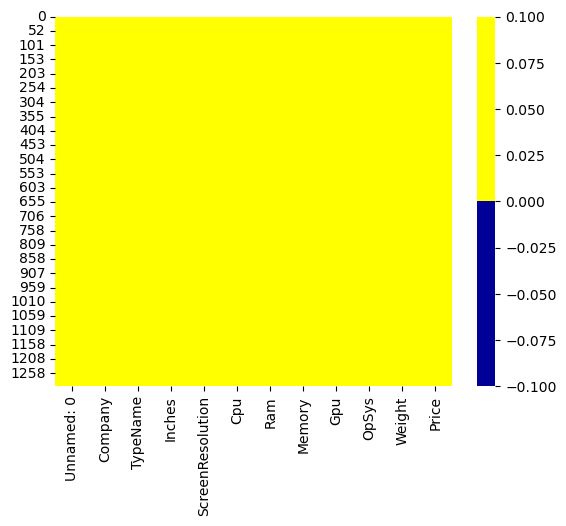

In [19]:
cols = df.columns[:12]
# (всё желтое когда всё в порядке)
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [20]:
for col in df.columns:
    ind_missing = df[df[col].isnull()].index
    df = df.drop(ind_missing, axis=0)

In [21]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Для каждого атрибута нужно определить:
### a)среднее значение, ско.
### b)построить гистограмму распределения значений, определить есть ли выбросы
    выбросы имеются, но для смысла атрибутов данного датаферма это нормально
### c)есть ли пропущенные значение, сколько
    все строки с пропущенными значениями были удалены ранее
### d)предложить вариант обработки пропущенных значений
    удалить :)

In [22]:
print("Среднее значение:")
print(df[['Inches','Weight','Price']].mean())
print("\nCКО:")
print(df[['Inches','Weight','Price']].std())

Среднее значение:
Inches       15.131890
Weight        2.077677
Price     59886.072669
dtype: float64

CКО:
Inches        1.955256
Weight        0.808377
Price     37323.784300
dtype: float64


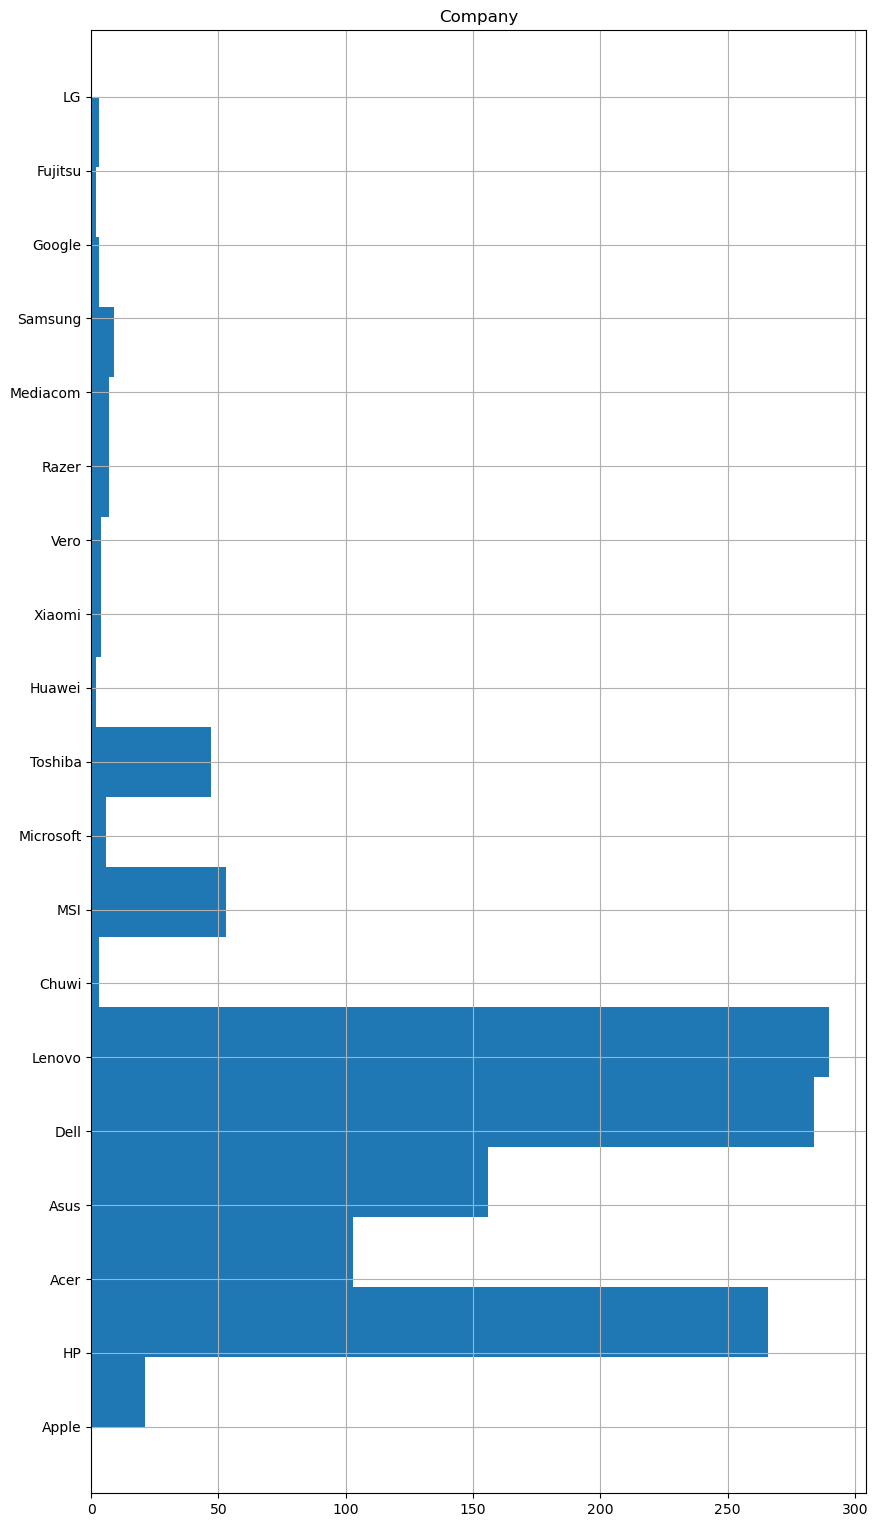

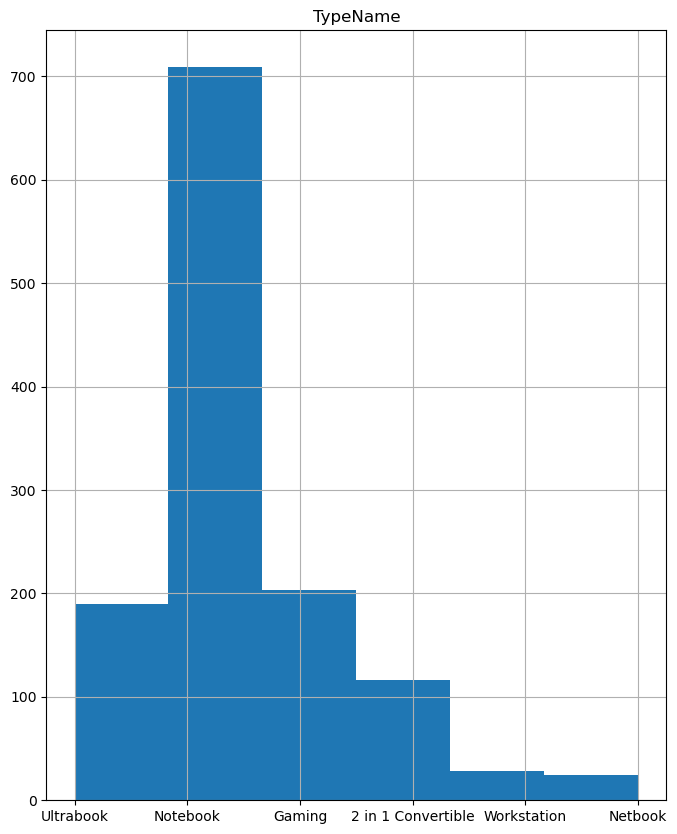

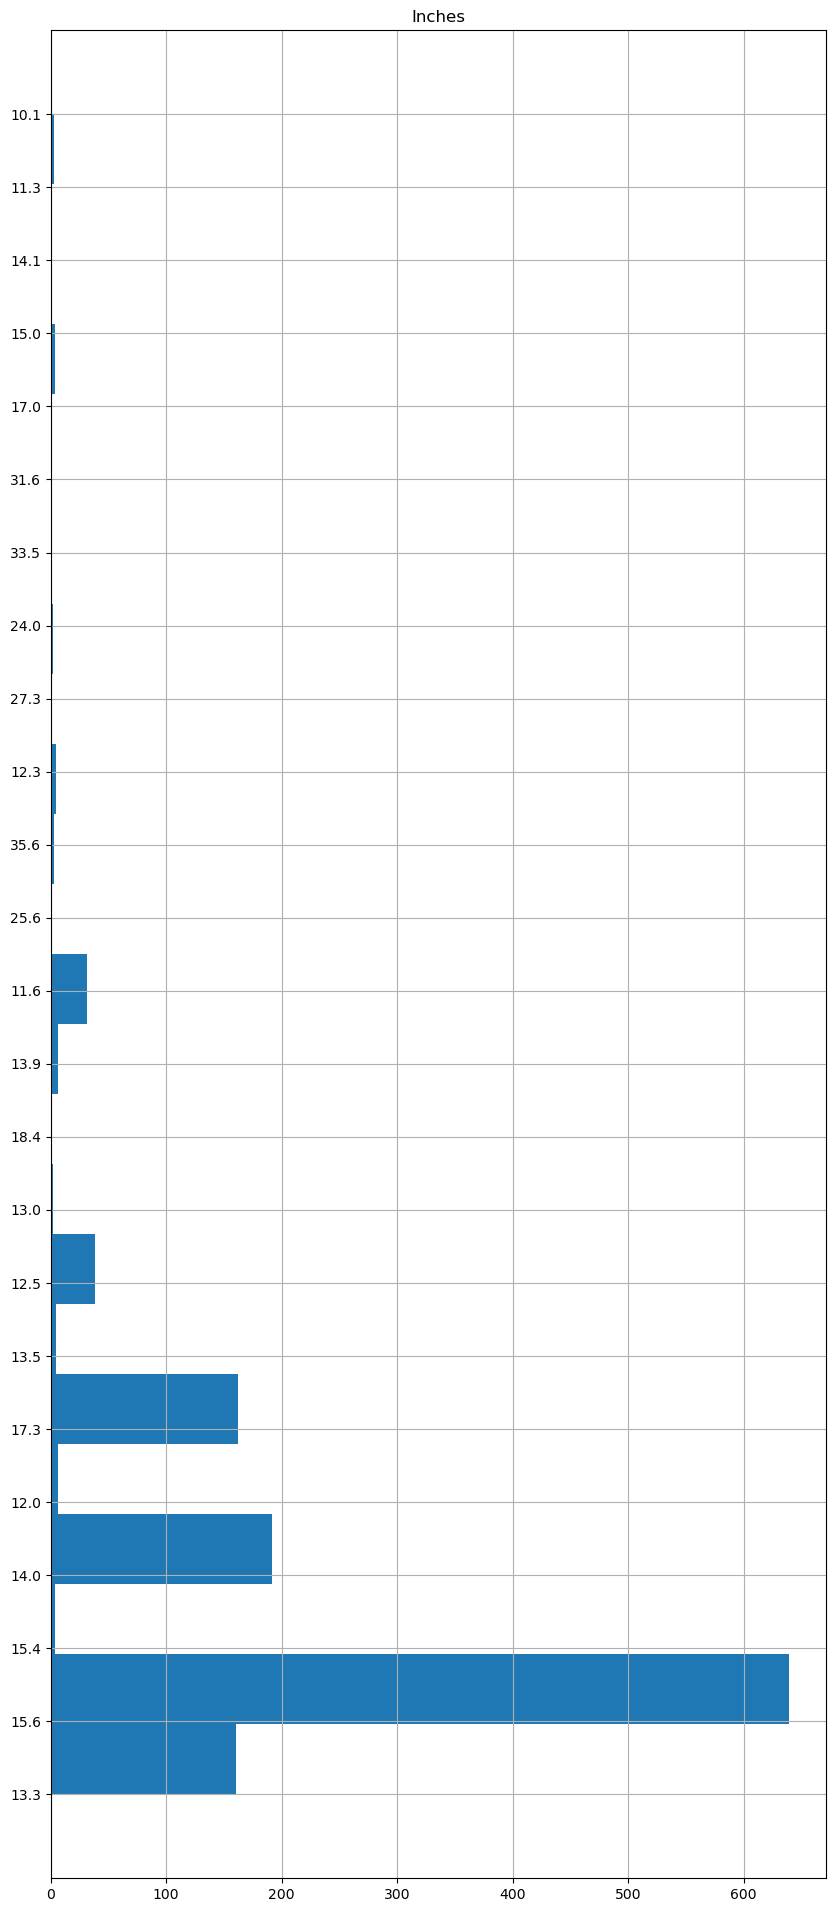

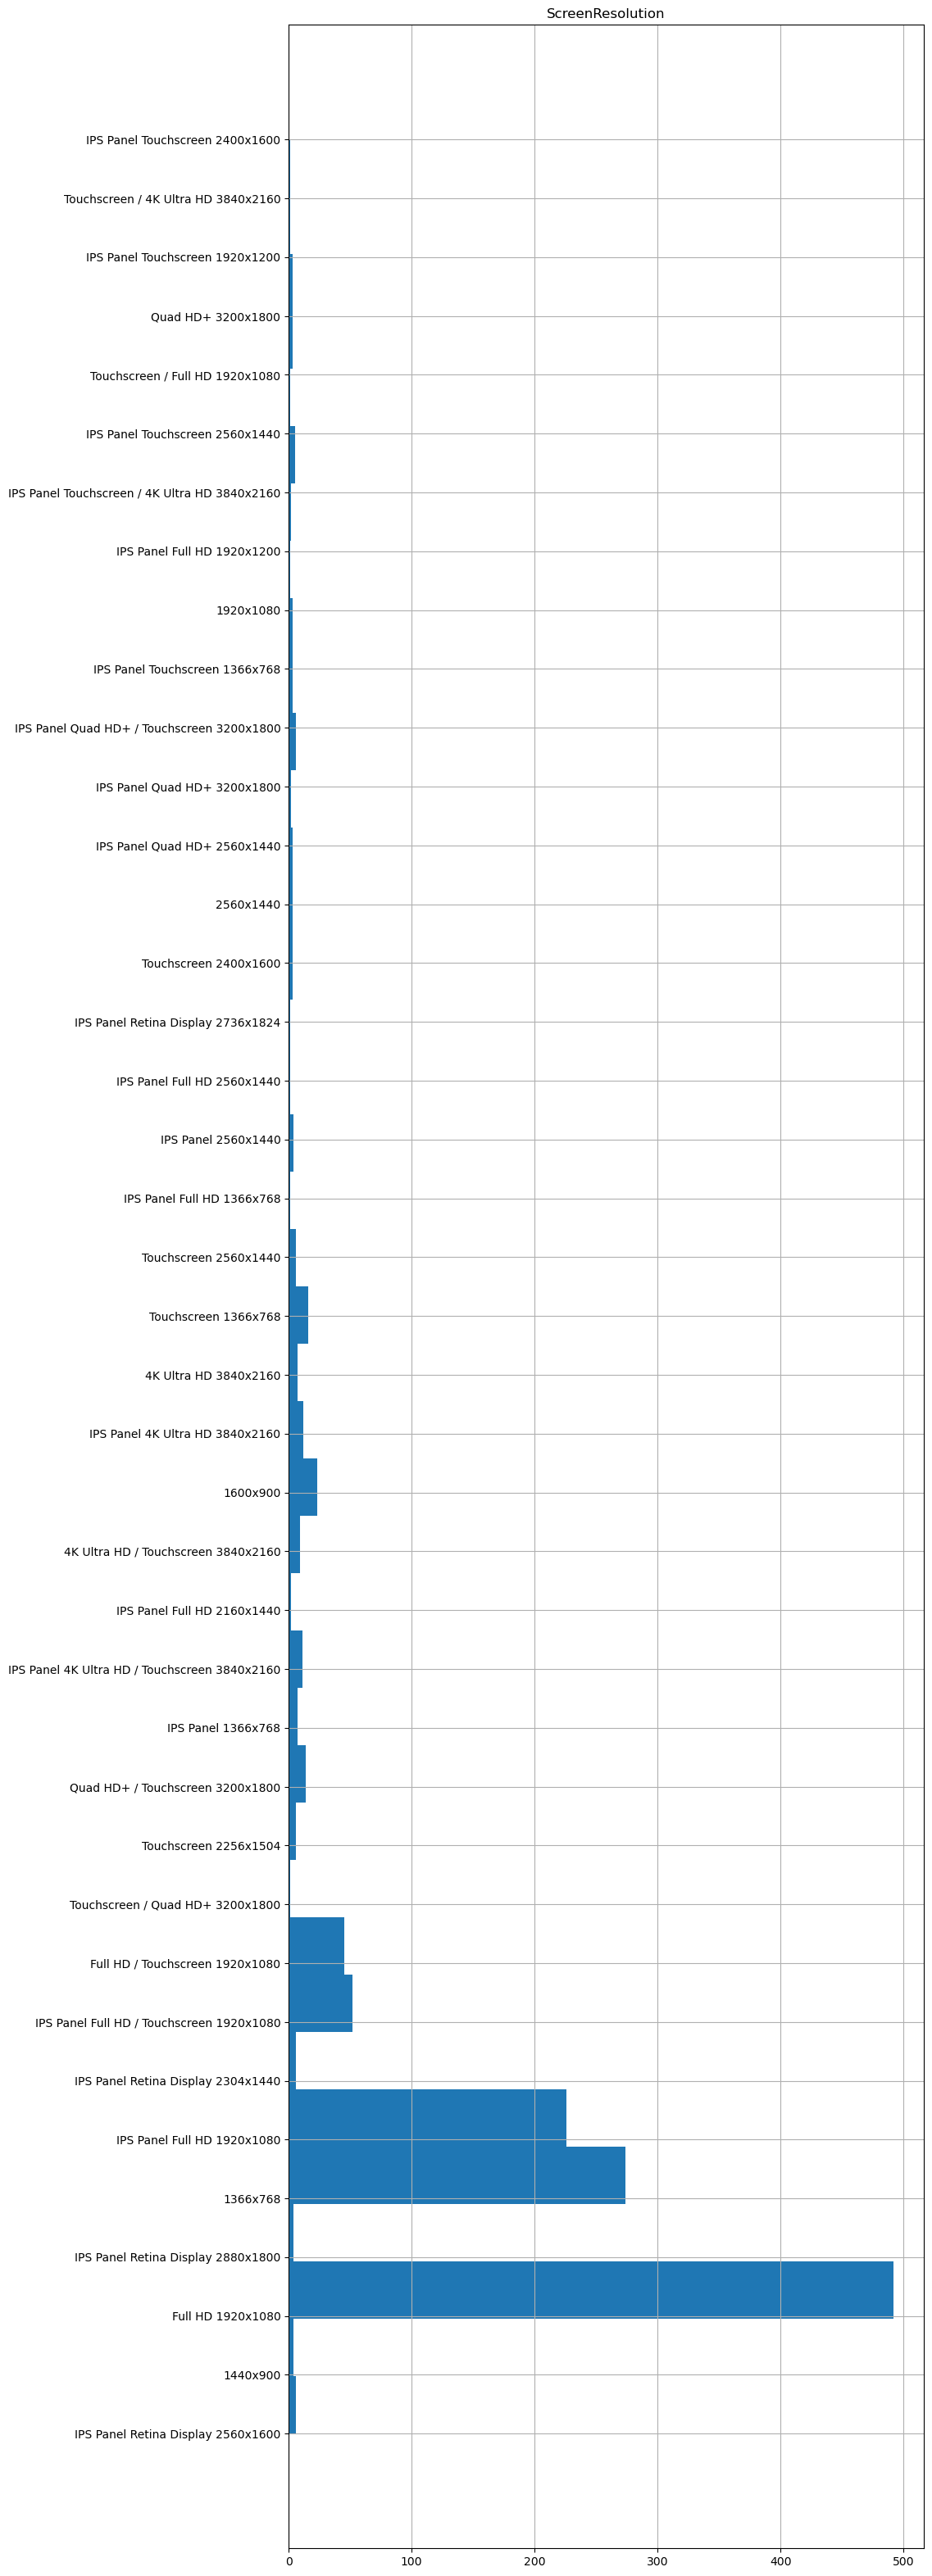

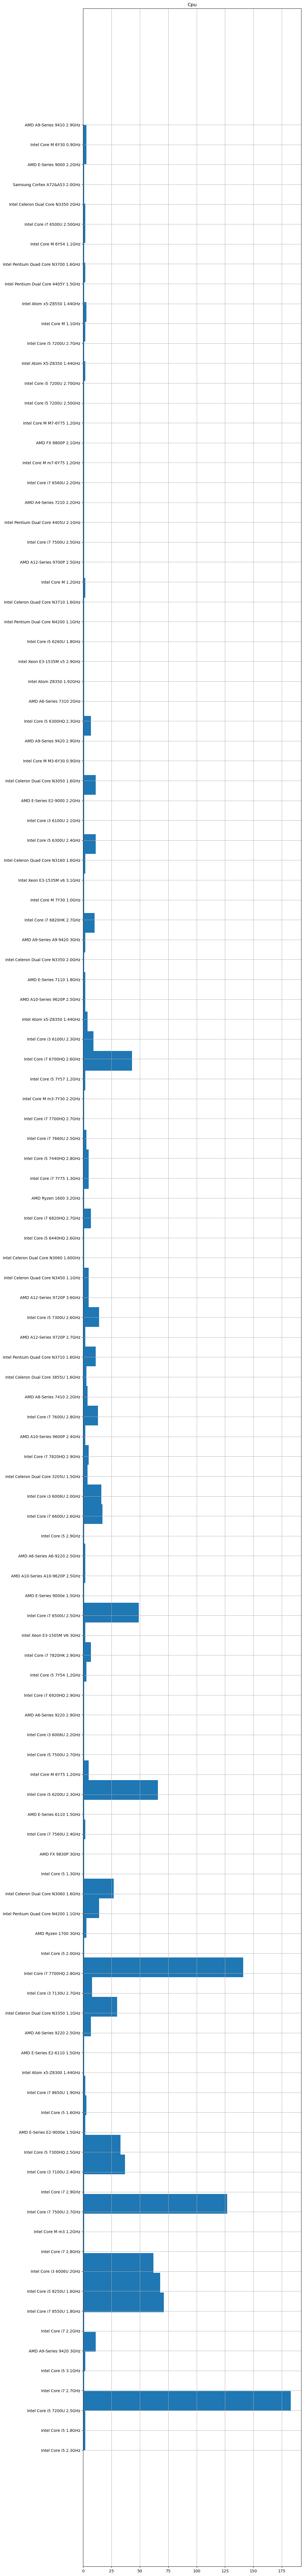

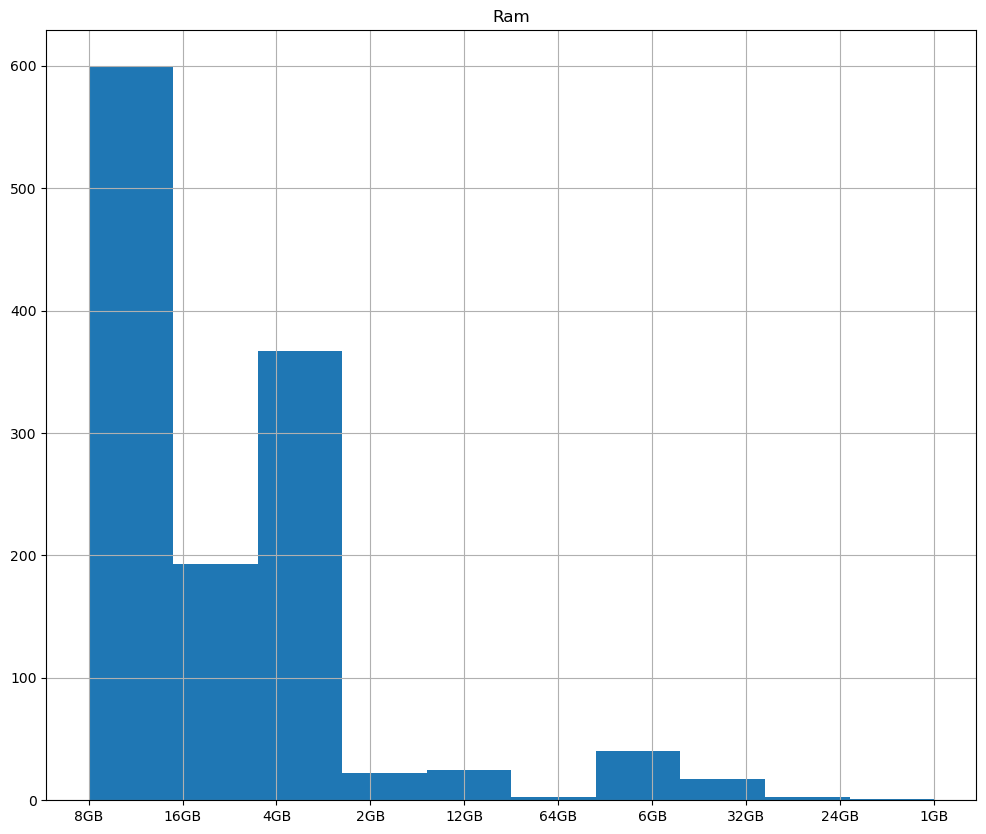

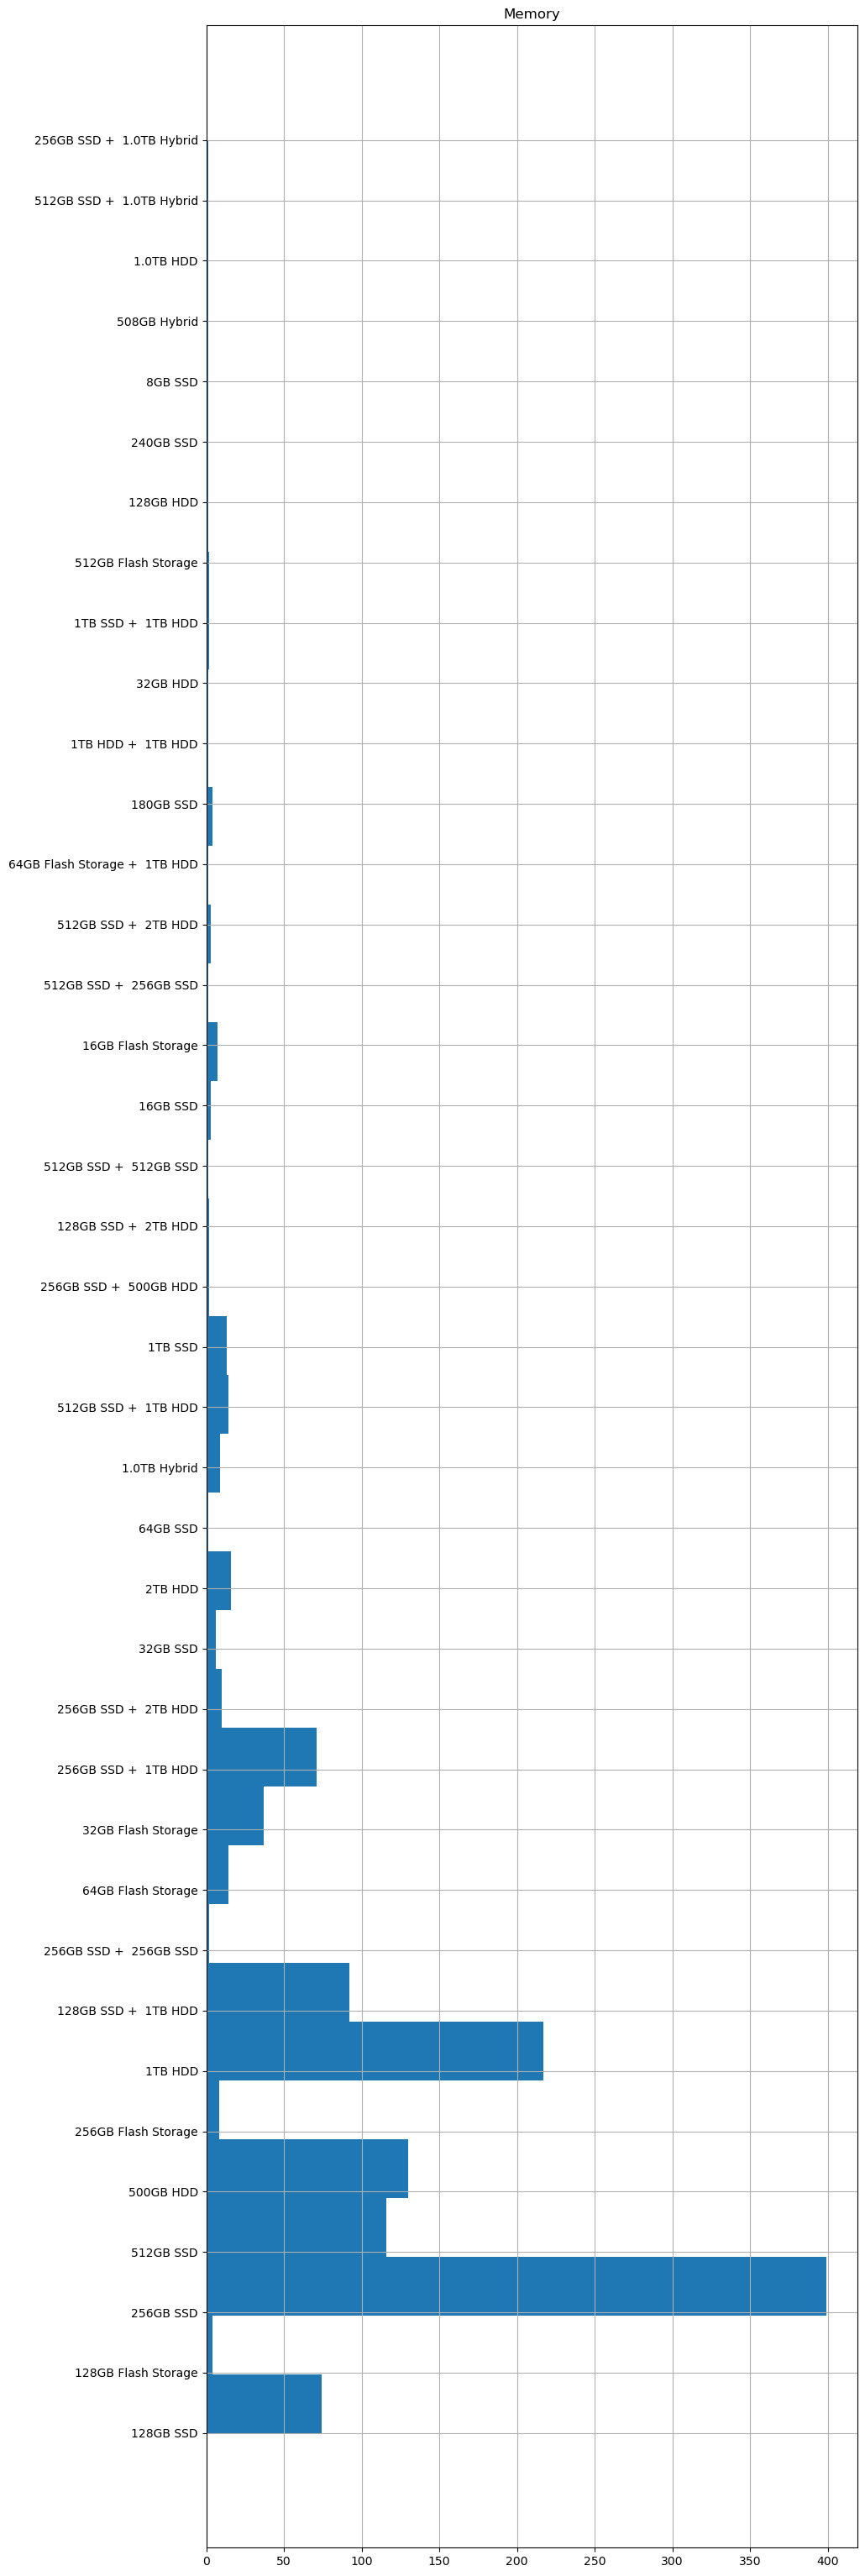

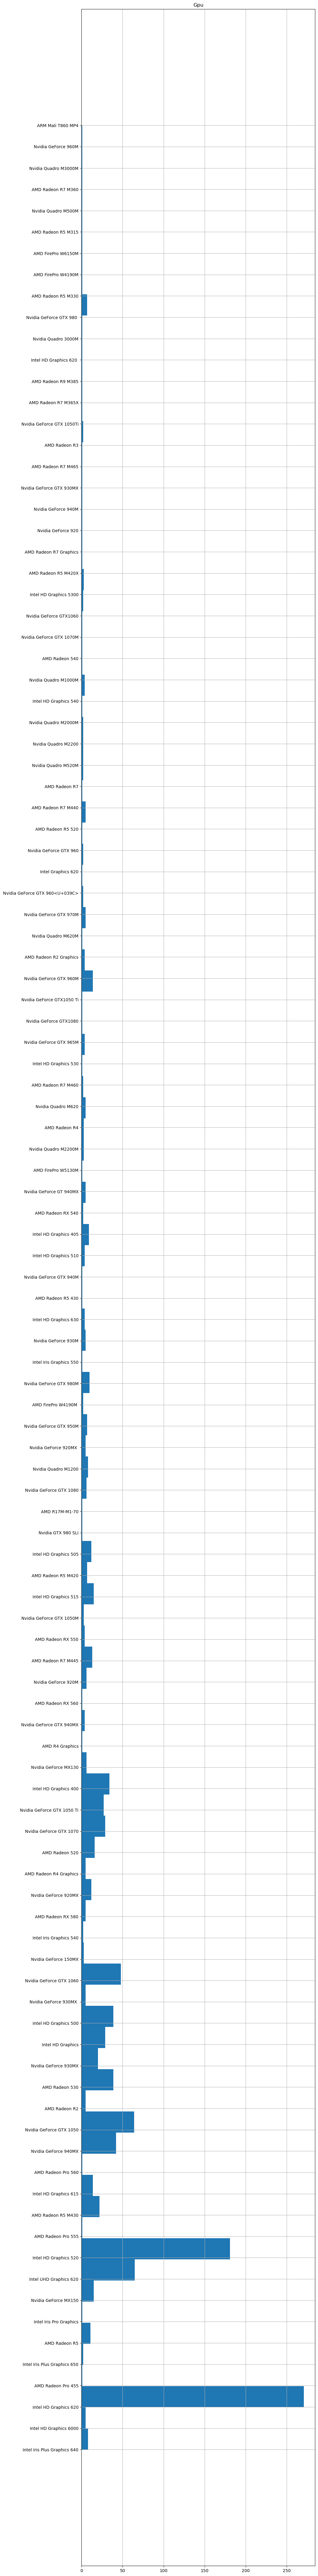

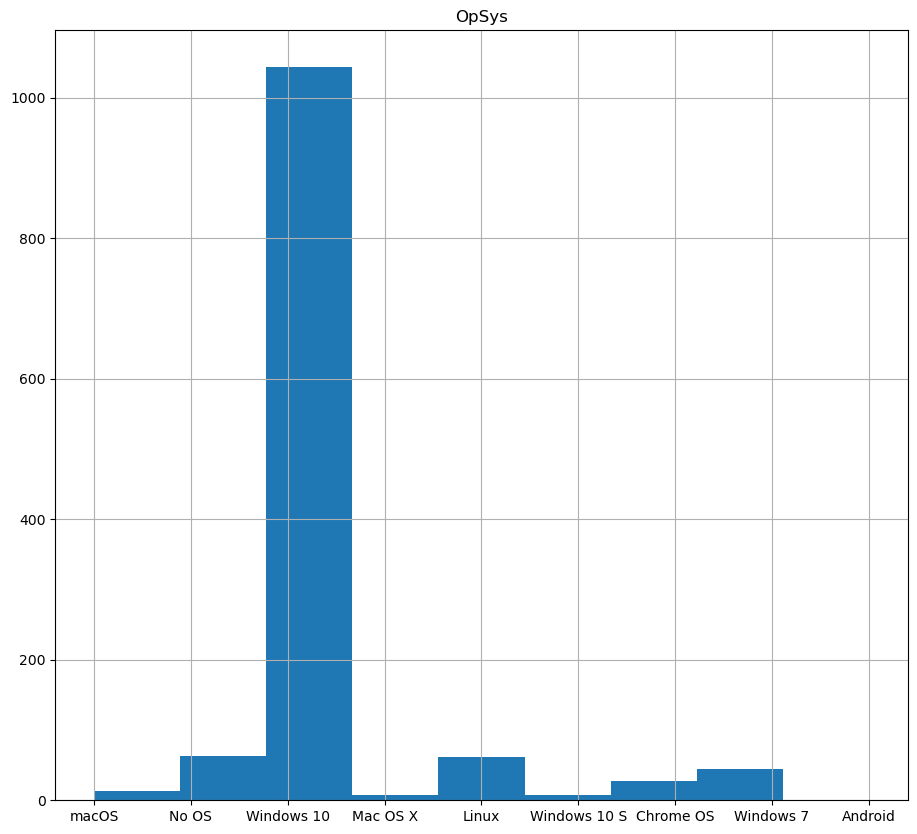

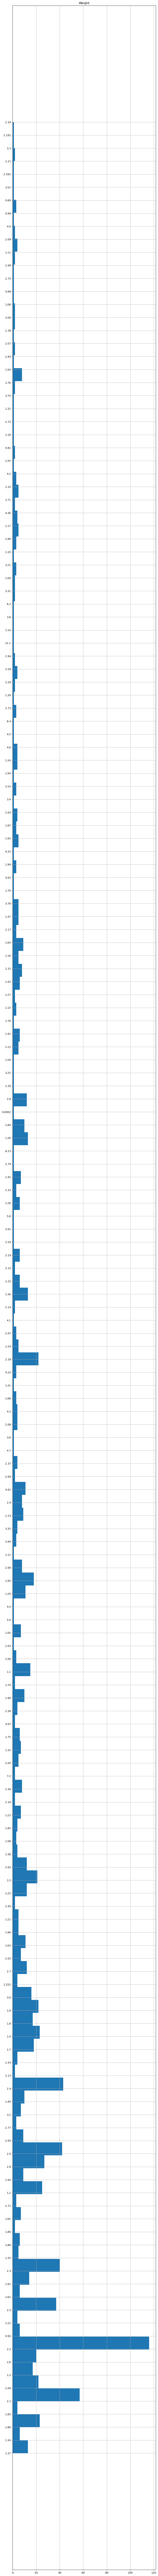

ValueError: Image size of 1000x77500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x77500 with 1 Axes>

In [23]:
for col in df.columns[1:]:
    x = df[col].unique().size
    if x > 10:
        plt.figure(figsize=(10,x))
        plt.hist(df[col].astype("string"), bins = x, orientation='horizontal')
    else:
        plt.figure(figsize=(x+2,10))
        plt.hist(df[col].astype("string"), bins = x)
    plt.grid(True)
    plt.title(col)

## Определить корреляцию между параметрами
### a.	какие атрибуты высококоррелированы, определить характер корреляции 
### b.	какие атрибуты не имеют корреляцию
    для имеющихся данных кореляцию, в теории, можно найти между всеми атрибутами
### c.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)
### d.	проанализируйте полученные результаты.
    наибольшая корреляция обнаружена между атрибутами Ram и Price


# главный атрибут - цена, корреляцию буду проверять на нём
# для более полной картины прведу атрибут Ram в тип float, некоторые другие атрибуты тоже можно перевести, но не смог найти как сопоставить одинаковым уникальным строкам свои уникальные значения, возможно я не правильно искал

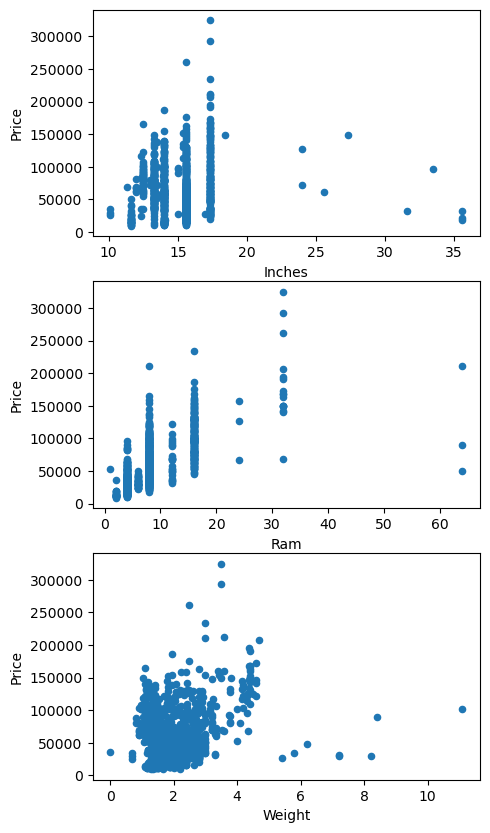

In [29]:
dd = df.copy()
dd['Ram'] = dd['Ram'].str.extract(r'(\d\d?)')
dd['Ram'] =  pd.to_numeric(dd['Ram'])
dd['Ram'] = dd['Ram'].str.extract(r'(\d\d?)')
dd['Ram'] =  pd.to_numeric(dd['Ram'])
dd = dd.select_dtypes(include=['float64', 'int64'])
fig, axes = plt.subplots(nrows=dd.columns.size-2, ncols=1, figsize=(5, 10))
for idx, col in enumerate(dd.columns[1:-1]):
    dd.plot(col, "Price", subplots=True, kind="scatter", ax=axes[idx])

In [31]:
dd.corrwith(df['Price']).drop(['Price', 'Unnamed: 0'])

Inches    0.045028
Ram       0.687176
Weight    0.176689
dtype: float64

In [48]:
dd[dd.select_dtypes(include=['float64', 'int64']).columns[1:]].corr()

,Inches,Ram,Weight,Price
Inches,1.000000,0.141975,0.494947,0.045028
Ram,0.141975,1.000000,0.283213,0.687176
Weight,0.494947,0.283213,1.000000,0.176689
Price,0.045028,0.687176,0.176689,1.000000
